In [1]:
%%javascript

# Bind cmd-shift-d to duplicate line of code
Jupyter.keyboard_manager.edit_shortcuts.add_shortcut('cmd-shift-d', {
    help : 'Duplicate current line',
    help_index : 'zz',
    handler: function(env) {
        var cm=env.notebook.get_selected_cell().code_mirror;
        // get a position of a current cursor in a current cell
        var current_cursor = cm.doc.getCursor();

        // read a content from a line where is the current cursor
        var line_content = cm.doc.getLine(current_cursor.line);
        cm.execCommand('goLineEnd');
        cm.execCommand('newlineAndIndent');
        cm.execCommand('indentLess');
        cm.doc.replaceSelection(line_content);
        cm.doc.setCursor(current_cursor.line + 1, current_cursor.ch);
        return false;
    }}
);

<IPython.core.display.Javascript object>

__Universal Robot Control__

In [1]:
import urx
import time, pickle
import numpy as np
import math3d as m3d

In [4]:
robot = urx.Robot("10.42.0.162", use_rt=True)

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 45
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 69
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1093
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1418


In [5]:
robot.set_digital_out(0, 1)
time.sleep(1)
robot.set_digital_out(0, 0)

In [6]:
robot.set_tcp((0, 0, 0.05, 0, 0, 0)) #ckeck Installation tab

In [43]:
robot.translate((0, 0, 0.05), acc=0.05, vel=0.05) #acceleration, velocity

<Transform:
<Orientation: 
array([[ 0.07783432,  0.32044236,  0.94406489],
       [ 0.77192567,  0.57989901, -0.26047628],
       [-0.63092993,  0.74902192, -0.20222164]])>
<Vector: (0.21806, 0.08281, 0.52842)>
>

In [42]:
robot.translate_tool((0, 0, -0.03), acc=0.05, vel=0.05)

<Transform:
<Orientation: 
array([[ 0.077762  ,  0.32029076,  0.94412229],
       [ 0.77189394,  0.58000217, -0.26034058],
       [-0.63097766,  0.74900688, -0.20212837]])>
<Vector: (0.21814, 0.08279, 0.47844)>
>

In [10]:
robot.get_pose()

<Transform:
<Orientation: 
array([[ 0.08540387, -0.99327366, -0.07818965],
       [-0.09470904,  0.07002787, -0.99303892],
       [ 0.99183485,  0.09221464, -0.08809134]])>
<Vector: (-0.10372, -0.33509, 0.22507)>
>

In [50]:
robot.get_pos()

<Vector: (-0.36120, -0.21739, 0.73764)>

In [ ]:
robot.getl()

In [7]:
def save_current_pos(fname):
    p = robot.getl()
    np.savetxt(fname, np.array(p))
       

def move_to_pos(fname, *args, **kwargs):
    p = np.loadtxt(fname)
    robot.movel(p, *args, **kwargs)
    
def print_pos(fname):
    p = np.loadtxt(fname)
    print(p)
    

In [98]:
# save_current_pos("in")

In [27]:
#save_current_pos("left_upper")

In [28]:
#save_current_pos('left_lower')

In [29]:
#save_current_pos('right_lower')

In [30]:
#save_current_pos('right_upper')

In [31]:
print_pos('in')
print_pos('left_upper')
print_pos('right_upper')
print_pos('left_lower')
print_pos('right_lower')

[ 0.40194198  0.08055999  0.32083104  0.63329529 -2.92655257 -0.16654437]
[ 0.52033115  0.12344319 -0.01983767 -0.85248639  2.97582147 -0.00356041]
[ 0.50468586 -0.11561577 -0.02770525 -0.16206209  3.13642507 -0.05833691]
[ 0.36583813  0.13604467 -0.02906532  0.89239631 -2.99806869 -0.1092104 ]
[ 0.35119105 -0.09811418 -0.02920187  0.05601277  3.13602951 -0.06045402]


In [27]:
# x_c = (0.53 - 0.39)/(4. - 188)
# y_c = (0.13 + 0.1) / (341. -135)
x_c = - (0.13 + 0.1)/(510. - 231)
y_c = - (0.53 - 0.39) / (248. -71)
x_frame = 325
y_frame = 155
y_robot = (x_frame - 231) * x_c + 0.12
x_robot = (y_frame - 71) * y_c + 0.53
print (x_c, y_c)
print (x_robot, y_robot)

-0.0008243727598566308 -0.0007909604519774012
0.4635593220338983 0.042508960573476695


In [8]:
p = np.array(robot.getl())
p[0] = x_robot
p[1] = y_robot
robot.movel(p, vel=0.05, acc=0.05)

KeyboardInterrupt: 

In [46]:
move_to_pos("in", vel=0.05, acc=0.05)

In [7]:
robot.getl()

[0.4357282103755868,
 -0.0006538049343836131,
 0.010423580071805667,
 -0.688402090050537,
 3.0524927893485425,
 0.09471774449779036]

In [16]:
robot.x += 0.01 #1 hour 10 minutes up to this point

In [59]:
p = robot.get_pos()

In [37]:
p.array

array([-0.44037436, -0.64668612,  0.71023683])

In [41]:
m3d.Vector(p.array)

<Vector: (-0.44037, -0.64669, 0.71024)>

In [19]:
import threading
from IPython.display import display
import ipywidgets as widgets
import time

fw = widgets.HTML(
    value='',
    placeholder='No data',
    description='Force:',
)

def observe_force(fw):
    while True:
        fw.value = "<br>".join(["{0:5} {1:7.3f}".format(*c) for c in 
                                zip("x y z rx ry rz".split(), robot.get_tcp_force())])

thread = threading.Thread(target=observe_force, args=(fw,))
display(fw)
thread.start()



In [20]:
robot.get_tcp_force().__str__()

'[ 1.02986823 -5.31505552 -6.80768816 -0.74716747 -0.688842    0.07069093]'

__Here starts CV__

In [40]:
%matplotlib notebook

import cv2 #pip install opencv-python
import matplotlib.pyplot as plt
import signal, time
import numpy as np
from numpy import linalg
#to check: cv2.getBuildInformation()
print (*filter(lambda s: "FFMPEG" in s, cv2.getBuildInformation().split("\n")))
#for opencv with ffmpeg in conda
#https://github.com/conda-forge/opencv-feedstock/
#pip uninstall opencv
#pip uninstall opencv-python
#conda unistall opencv
#conda install conda=4.0.11
#conda config --add channels conda-forge
#conda install opencv


    FFMPEG:                      YES


In [41]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

In [42]:
%%bash
ls /dev | grep video

video0
video1


In [43]:
vc = cv2.VideoCapture(1) #0 for the first webcam, 1 for the second..

In [44]:
def imshow(frame, from_color_space='bgr'):
    plt.figure()
    if from_color_space == 'bgr':
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    elif from_color_space == 'hsv':
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_HSV2RGB)    # makes the blues image look real colored
    else:
        rgb_frame=frame
    webcam_preview = plt.imshow(rgb_frame)

def online_view():
    plt.ion()

    if vc.isOpened(): # try to get the first frame
        is_capturing, frame = vc.read()
        imshow(frame)   
    else:
        is_capturing = False

    signal.signal(signal.SIGINT, signal_handler)
    is_interrupted = False
    while is_capturing:
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        webcam_preview.set_data(frame)
        plt.draw()

        try:    # Avoids a NotImplementedError caused by `plt.pause`
            plt.pause(0.05)
        except Exception:
            pass
        if is_interrupted:
            vc.release()
            break
    
def get_frame():
    timeout = time.time() + 0.1
    while time.time() < timeout:
        if vc.isOpened(): # try to get the first frame
            is_capturing, frame = vc.read()
        else:
            raise (Exception("Unable to capture"))
    return frame


#frame = get_frame()
#imshow(frame)

#online_view()

<IPython.core.display.Javascript object>


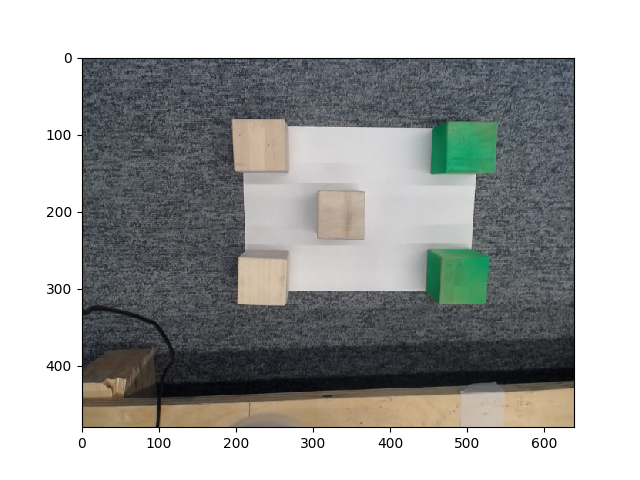

In [47]:
frame = get_frame()
imshow(frame)

__The blob detection__

In [138]:
move_to_pos('in', acc=0.05, vel=0.05)

<IPython.core.display.Javascript object>


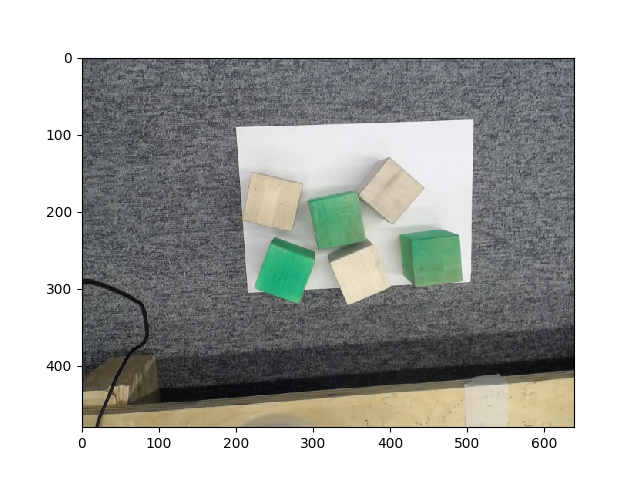

<IPython.core.display.Javascript object>


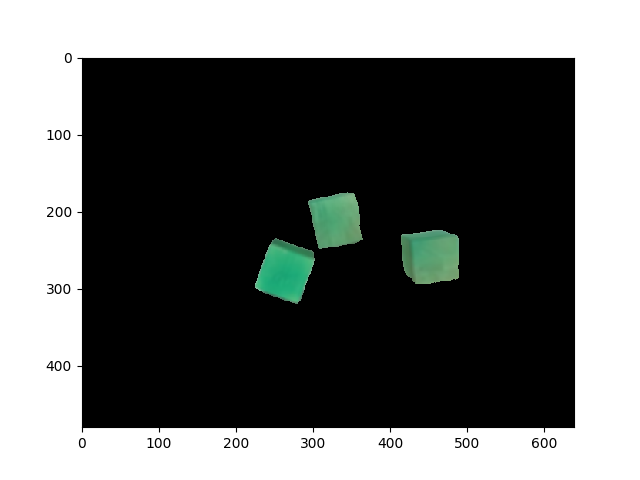

<IPython.core.display.Javascript object>


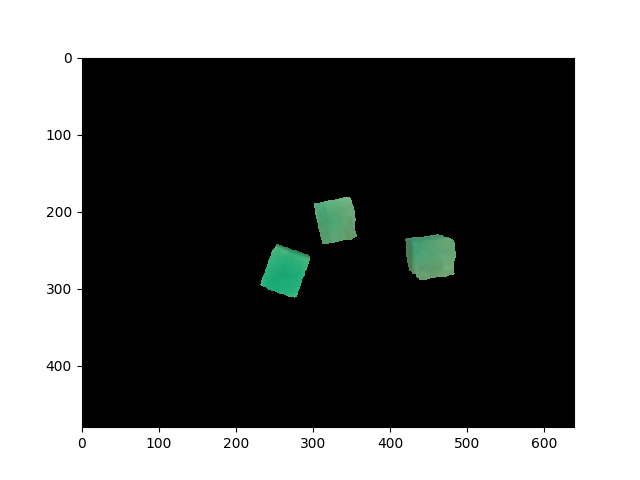

In [143]:
# Read image
# im = cv2.imread("detection/cubes_4.png")
im = get_frame()
cv2.imwrite('test.png', im)

imshow(im)

# Blur image to remove noise
im = cv2.GaussianBlur(im, (5,5), 40)

# imshow(im)

hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

greenMin = (45, 70, 100)
greenMax = (90, 255, 255)

# Sets pixels to white if in purple range, else will be set to black
mask = cv2.inRange(hsv, greenMin, greenMax)

# Bitwise-AND of mask and purple only image - only used for display
masked = cv2.bitwise_and(im, im, mask= mask)

imshow(masked)

# dilate makes the in range areas larger
mask = cv2.erode(mask, None, iterations=5)

# mask = cv2.dilate(mask, None, iterations=8)


# Bitwise-AND of mask and purple only image - only used for display
masked = cv2.bitwise_and(im, im, mask= mask)

imshow(masked)

In [35]:
im

3
36.97258758544922
39.118507385253906
34.75407028198242


<IPython.core.display.Javascript object>


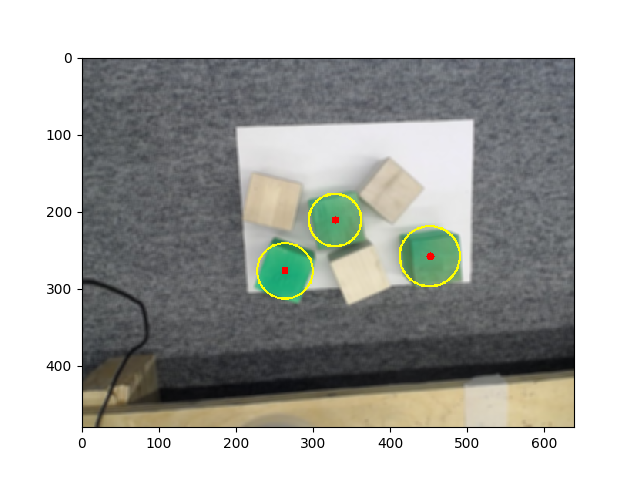

In [144]:
pts = []

# find contours in the mask and initialize the current
# (x, y) center of the ball
cnts = cv2.findContours(mask.copy(), cv2.RETR_LIST,
    cv2.CHAIN_APPROX_SIMPLE)[-2]
center = None

print (len(cnts))

# only proceed if at least one contour was found
for c in cnts:
    # find the largest contour in the mask, then use
    # it to compute the minimum enclosing circle and
    # centroid
#     c = max(cnts, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)

    # only proceed if the radius meets a minimum size
    if radius > 25 and radius < 200:
        print (radius)
        
        M = cv2.moments(c)
        center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
        if center[1] > 400:
            continue
        # draw the circle and centroid on the frame,
        # then update the list of tracked points
        cv2.circle(im, (int(x), int(y)), int(radius),
            (0, 255, 255), 2)
        cv2.circle(im, center, 5, (0, 0, 255), -1)

        # update the points queue
        pts.append(center)

imshow(im)

In [100]:
def get_coordinates1(x_frame, y_frame):
    x_c = - (0.13 + 0.1)/(500. - 233)
    y_c = - (0.51 - 0.36) / (320. -113)
    y_robot = (x_frame - 233) * x_c + 0.1
    x_robot = (y_frame - 113) * y_c + 0.53
    return (x_robot, y_robot)

In [135]:
def get_coordinates(x_frame, y_frame):
    x0p, x1p = (234., 493.)
    y0p, y1p = (118., 282.)
    x0r, x1r = (0.355, 0.51)
    y1r, y0r = (-0.1, 0.13)
    x_c =  (x1r-x0r)/(y0p - y1p)
    y_c =  (y1r - y0r)/(x1p - x0p)
    y_robot = (x_frame - x0p) * y_c + y0r
    x_robot = (y_frame - y0p) * x_c + x1r
    return (x_robot, y_robot)

In [118]:
get_coordinates(234, 282)

(0.355, 0.13)

In [136]:
pts

[(355, 284), (450, 275), (454, 193)]

In [23]:
# save_current_pos('green')

In [125]:
move_to_pos('in', acc=0.05, vel=0.05)

In [20]:
# save_current_pos('white')

In [145]:
for point in pts:
    p = np.array(robot.getl())
    p[2] = 0.010
    p[0], p[1] = get_coordinates(point[0], point[1])
    robot.movel(p, acc=0.05, vel=0.05)
    robot.translate((0, 0, -0.05), acc=0.05, vel=0.05)
    robot.set_digital_out(0, 1)
    robot.translate((0, 0, 0.05), acc=0.05, vel=0.05)
    move_to_pos('in', acc=0.05, vel=0.05)
    move_to_pos('green', acc=0.05, vel=0.05)
    robot.set_digital_out(0, 0)
    move_to_pos('in', acc=0.05, vel=0.05)

<IPython.core.display.Javascript object>


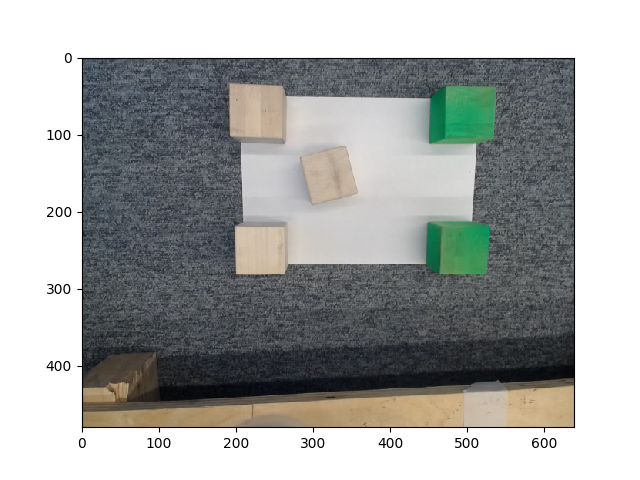

<IPython.core.display.Javascript object>


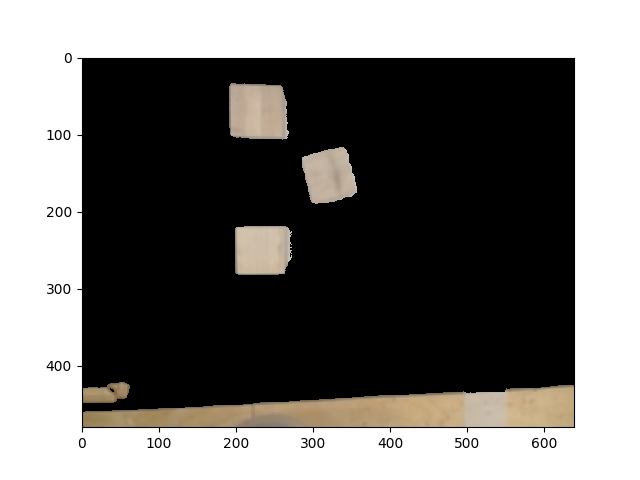

<IPython.core.display.Javascript object>


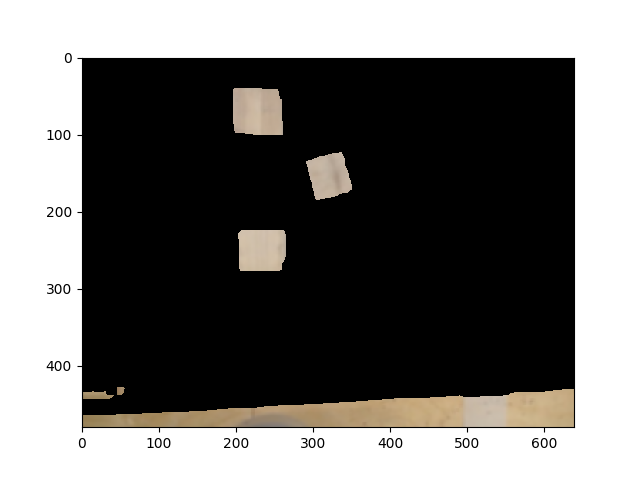

In [36]:
# Read image
# im = cv2.imread("detection/cubes_4.png")
im = get_frame()
cv2.imwrite('test.png', im)

imshow(im)

# Blur image to remove noise
im = cv2.GaussianBlur(im, (5,5), 40)

# imshow(im)

hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

greenMin = (10, 24, 114)
greenMax = (22, 255, 255)

# Sets pixels to white if in purple range, else will be set to black
mask = cv2.inRange(hsv, greenMin, greenMax)

# Bitwise-AND of mask and purple only image - only used for display
masked = cv2.bitwise_and(im, im, mask= mask)

imshow(masked)

# dilate makes the in range areas larger
mask = cv2.erode(mask, None, iterations=5)

# mask = cv2.dilate(mask, None, iterations=8)


# Bitwise-AND of mask and purple only image - only used for display
masked = cv2.bitwise_and(im, im, mask= mask)

imshow(masked)

In [ ]:
pts = []

# find contours in the mask and initialize the current
# (x, y) center of the ball
cnts = cv2.findContours(mask.copy(), cv2.RETR_LIST,
    cv2.CHAIN_APPROX_SIMPLE)[-2]
center = None

print (len(cnts))

# only proceed if at least one contour was found
for c in cnts:
    # find the largest contour in the mask, then use
    # it to compute the minimum enclosing circle and
    # centroid
#     c = max(cnts, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)

    # only proceed if the radius meets a minimum size
    if radius > 25 and radius < 200:
        print (radius)
        
        M = cv2.moments(c)
        center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
        if center[1] > 400:
            continue
        # draw the circle and centroid on the frame,
        # then update the list of tracked points
        cv2.circle(im, (int(x), int(y)), int(radius),
            (0, 255, 255), 2)
        cv2.circle(im, center, 5, (0, 0, 255), -1)

        # update the points queue
        pts.append(center)

imshow(im)